# Tirgul 9 - a sample project analysis

According to EDA (Exploratory data analysis) & modeling steps:

- Wrangling the data
- Understanding the data 
- Preparing the data
- Modeling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#### The Dataset
The dataset contains information on students and their grades in math, reading and writing.
[link to the data source](https://www.kaggle.com/spscientist/students-performance-in-exams)

In [2]:
url = 'https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/tirgulim/tirgul9/StudentsPerformance.csv'
data = pd.read_csv(url)
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


## 1. Wrangling the data:

- Treat missing values (if needed)
- Treat column names (if needed)
- Treat data types (if needed)
- Treat any other weird thing your data might have

### Treat missing values

Check if there are missing values:

In [3]:
data.isnull().sum().sort_values(ascending=False)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Apearantly there weren't any 'na's' in the data

### Fixing data types
Check if any of the data types need to be fixed:

In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

We'll leave them as objects for now, but might change them later, depending on what we will want to do

## 2. Understanding the data

Let's see a summary in a pivot table (note that the default is 'mean'):

In [5]:
data.pivot_table(['math score','reading score','writing score' ],'gender') 

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


- Looks like the male students are leading in Math, but are behind on Reading and Writing
- How many males and how many females?

In [6]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

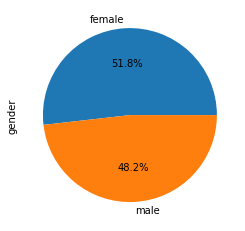

In [7]:
data['gender'].value_counts().plot.pie(autopct='%1.1f%%')

Study the differences between males and females:


Seperate into two datasets:

In [8]:
female = data.loc[data.gender == 'female']
male = data.loc[data.gender == 'male']
male.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52


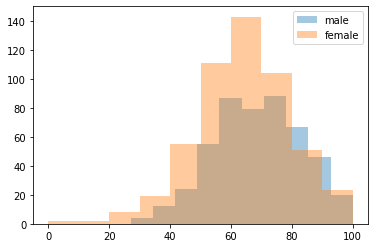

In [9]:
plt.hist(male['math score'], alpha=0.4, label='male')
plt.hist(female['math score'], alpha=0.4, label='female')
plt.legend(loc='upper right')


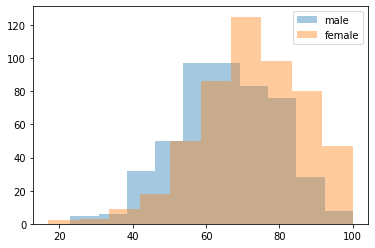

In [10]:
plt.hist(male['reading score'], alpha=0.4, label='male')
plt.hist(female['reading score'], alpha=0.4, label='female')
plt.legend(loc='upper right')


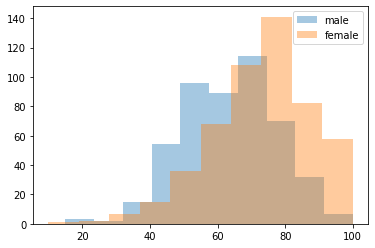

In [11]:
plt.hist(male['writing score'], alpha=0.4, label='male')
plt.hist(female['writing score'], alpha=0.4, label='female')
plt.legend(loc='upper right')

We can see that male students tend to have a smaller variance then the female students.

Let's calculate the standard deviation and the range of scores

In [12]:
data.groupby('gender').std()

,math score,reading score,writing score
gender,,,
female,15.491453,14.378245,14.844842
male,14.356277,13.931832,14.113832


### Correlation between scores

In [13]:
scoreData = data[['math score','reading score','writing score']]
scoreData.tail()

,math score,reading score,writing score
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77
999,77,86,86


In [14]:
scoreData.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


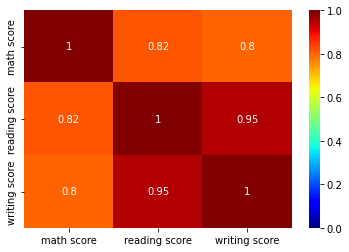

In [15]:
# cmap='jet' refers to table colors
#  vmin=0.0 , vmax = 1 indicate the lower and upper bounderies of legend 
# annot=True display the value of each square
sns.heatmap(scoreData.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)

##### Obeservation: 
>
> The corrolation across subjects is quite high, between reading and writing is near perfect.
>

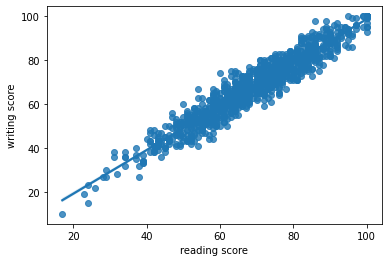

In [16]:
sns.regplot(x='reading score', y='writing score', data=data);

> Decreased correlation displays a higher spread

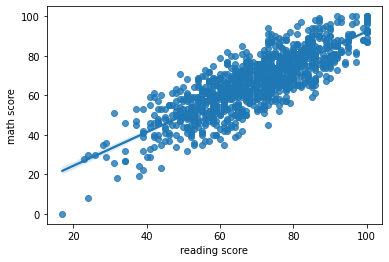

In [17]:
sns.regplot(x='reading score', y='math score', data=data);
# 

##### Looking at parnetal level of education

In [18]:
parentEducData = data[["parental level of education"]]
parentEducData.tail()

,parental level of education
995,master's degree
996,high school
997,high school
998,some college
999,some college


In [19]:
parentEducData.value_counts() # counts the amount from each categorized value

parental level of education
some college                   226
associate's degree             222
high school                    196
some high school               179
bachelor's degree              118
master's degree                 59
dtype: int64


[pie charts docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)

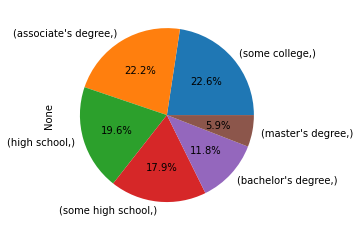

In [20]:
parentEducData.value_counts().plot.pie(autopct='%1.1f%%')
# autopct display percents for each part

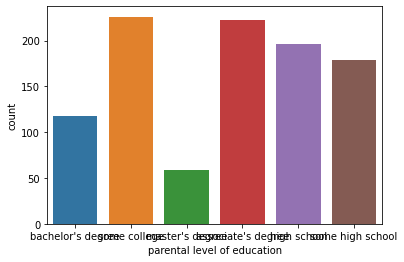

In [21]:
sns.countplot(x="parental level of education", data=data)

---
##### Project tip: When there are more than 2-3 categories, a countplot is ALWAYS BETTER than a pie plot

It's just much easier to read it.

The only problem with our countplot is that the labels ovelap. There are many ways to fix it. 

Google it. [for example](https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot)

We'll just adjust the figure size: 

---

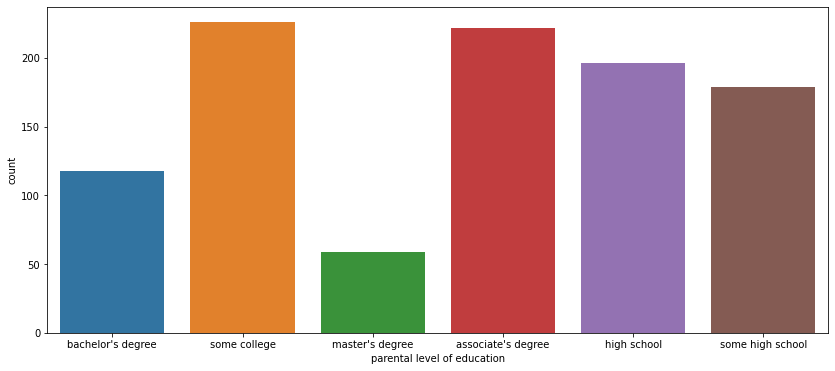

In [22]:
plt.figure(figsize=(14,6)) 
sns.countplot(x="parental level of education", data=data)

---

##### Project tip: make sure your plots are readable (like we have just done).
You don't need to show both the unreadable version and the readable version. We know you have worked hard and struggled. Present your best!!

---

#### Searching for more correlations

Let's add a column with the mean score across all subjects:

In [23]:
data['mean score'] = scoreData.mean(axis=1)
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333
999,female,group D,some college,free/reduced,none,77,86,86,83.000000


Let's check - is there any connection between parental level of education and lunch to grades?

In [24]:
EducLunchMean_ScoreData = data[['parental level of education','lunch','mean score']].copy(deep=True) # not shallow/reference copy, change in data will not be affected in EducLucnh<ean
EducLunchMean_ScoreData.tail()

,parental level of education,lunch,mean score
995,master's degree,standard,94.000000
996,high school,free/reduced,57.333333
997,high school,free/reduced,65.000000
998,some college,standard,74.333333
999,some college,free/reduced,83.000000


In [25]:
EducLunchMean_ScoreData.pivot_table('mean score','parental level of education').sort_values("mean score")

,mean score
parental level of education,
high school,63.096939
some high school,65.108007
some college,68.476401
associate's degree,69.569069
bachelor's degree,71.923729
master's degree,73.598870


##### Don't present in an incomprehensible way.
##### For example (of what NOT to do):

parental level of education
associate's degree    AxesSubplot(0.125,0.125;0.775x0.755)
bachelor's degree     AxesSubplot(0.125,0.125;0.775x0.755)
high school           AxesSubplot(0.125,0.125;0.775x0.755)
master's degree       AxesSubplot(0.125,0.125;0.775x0.755)
some college          AxesSubplot(0.125,0.125;0.775x0.755)
some high school      AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean score, dtype: object

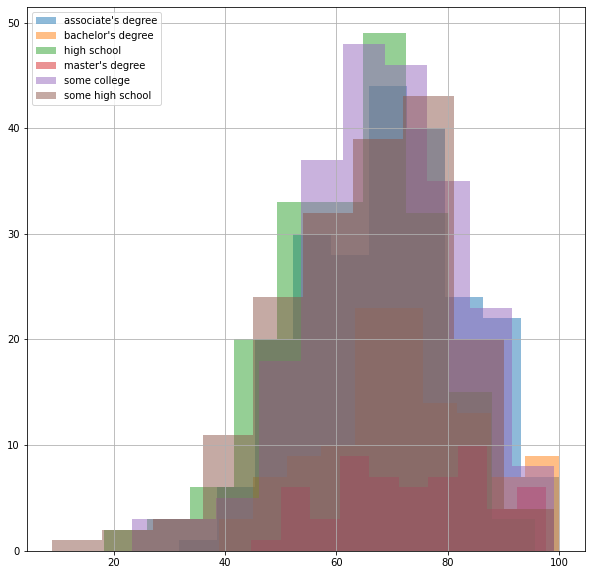

In [26]:
EducLunchMean_ScoreData.groupby('parental level of education')['mean score'].hist(alpha=0.5,legend=True,figsize=(10,10))
# We cannot use 'pivot_table' here since we do not wish to aggregate the data

#### The connection bewtween lunch and student's mean score:

In [27]:
EducLunchMean_ScoreData.pivot_table('mean score','lunch')

,mean score
lunch,
free/reduced,62.199061
standard,70.837209


We can see some connection here

lunch
free/reduced    AxesSubplot(0.125,0.125;0.775x0.755)
standard        AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean score, dtype: object

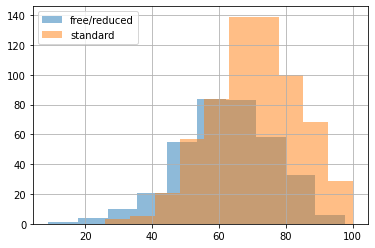

In [28]:
EducLunchMean_ScoreData.groupby('lunch')['mean score'].hist(alpha=0.5,legend=True)

##### Observation:
> The lunch type tells us more about the student grades.
> Students with a standard lunch do better.
> This may say more about the studen't background then about their real abilites

#### The connection between parent education level and lunch type:

Turn the lunch into a category

Standard = 1

free/reduced = 0

In [29]:
EducLunchMean_ScoreData['lunch_cat'] = EducLunchMean_ScoreData['lunch'].astype('category').cat.codes
EducLunchMean_ScoreData

,parental level of education,lunch,mean score,lunch_cat
0,bachelor's degree,standard,72.666667,1
1,some college,standard,82.333333,1
2,master's degree,standard,92.666667,1
3,associate's degree,free/reduced,49.333333,0
4,some college,standard,76.333333,1
...,...,...,...,...
995,master's degree,standard,94.000000,1
996,high school,free/reduced,57.333333,0
997,high school,free/reduced,65.000000,0
998,some college,standard,74.333333,1


In [30]:
ptLunchEduc = EducLunchMean_ScoreData.pivot_table('lunch_cat','parental level of education').sort_values(by='lunch_cat')
ptLunchEduc

,lunch_cat
parental level of education,
master's degree,0.593220
bachelor's degree,0.627119
high school,0.642857
some college,0.650442
associate's degree,0.653153
some high school,0.659218


> ##### Observation:
> It is interesting to see, that the lunch type is spread more or less equaly between the parent education levels. 
> Superficially, if lunch represents parents financial level, it was not affected by their education.


##### Project tip:
An observation is always better if it is also visual


(0.0, 1.0)

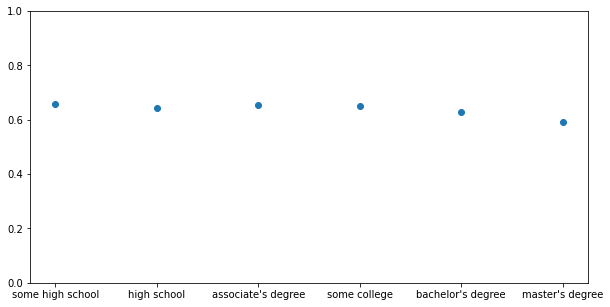

In [31]:
# We manually orderd the plot according to the degrees
order = [5,2,4,3,1,0]
plt.figure(figsize=(10,5))
plt.scatter(ptLunchEduc.index[order],ptLunchEduc.values[order])
plt.ylim(0,1)

#### The connection between parents education level and mean score:



The mean score grouped by parent's education:

In [32]:
mean_parent = EducLunchMean_ScoreData.groupby('parental level of education')['mean score'].mean()
mean_parent


parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: mean score, dtype: float64

In a scatter plot:

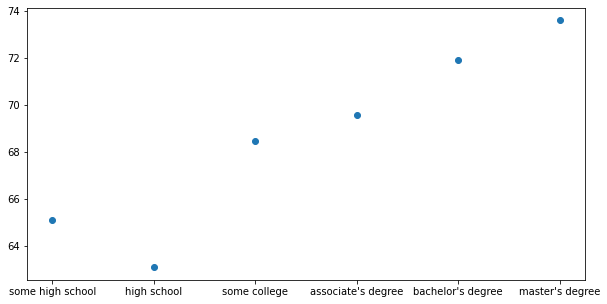

In [33]:
# We manually orderd the plot according to the degrees
order = [5,2,4,0,1,3]
plt.figure(figsize=(10,5))
plt.scatter(mean_parent.index[order],mean_parent.values[order])


##### Project tip: 
Think of which figure will present your data in the best way

In this case - a boxplot is better than a scatter plot

Present a boxplot, with rotated labels on x-axis

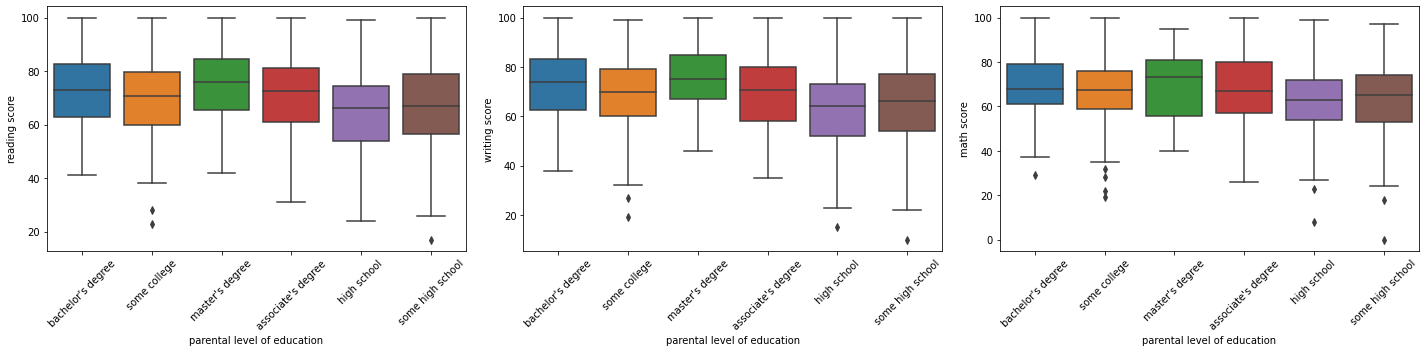

In [34]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.boxplot(ax=axes[0], x='parental level of education', y='reading score', data=data)
sns.boxplot(ax=axes[1], x='parental level of education', y='writing score', data=data)
sns.boxplot(ax=axes[2], x='parental level of education', y='math score', data=data)
for i, ax in enumerate(fig.axes):
    axes[i].tick_params(axis='x', rotation=45) # chage to y axis and -45 and see what happens
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

##### Boxplot for mean score

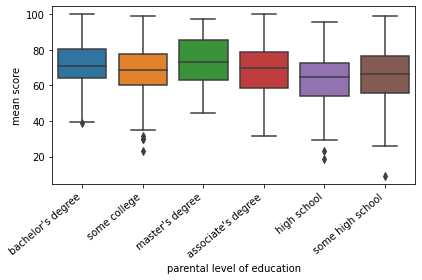

In [35]:
ax = sns.boxplot(x='parental level of education', y='mean score', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### The connection between education level and lunch type and mean score:

The mean score grouped by parent's education: and student's mean score:

In [36]:
EducLunchMean_ScoreData.pivot_table('mean score','parental level of education','lunch',margins=True)

lunch,free/reduced,standard,All
parental level of education,,,
associate's degree,65.428571,71.767816,69.569069
bachelor's degree,67.053030,74.819820,71.923729
high school,57.376190,66.275132,63.096939
master's degree,67.111111,78.047619,73.598870
some college,62.970464,71.435374,68.476401
some high school,57.224044,69.183616,65.108007
All,62.199061,70.837209,67.770667




- The bottom margin shows the score according to the lunch (free/standard)
- The right margin shows the score according to the parents degree
- The mean for students with standard lunch is 8.5 points higher!


> ##### Observation:
> The parent's education level does not have a direct effect on the lunch type. 
>
> The parent's education level does not have a direct effect on the mean score. 
>
> But - the parent's education  level combined with the lunch type has an effect on the mean score. 

## 3. Building a model from the data

We will try to predict mean score using decision tree, based on gender, race and test preparation. 

#### Preparing the data for learning

In [37]:
X = pd.get_dummies(data[['gender','race/ethnicity','lunch','test preparation course']])
y = data[['mean score']]

X.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,1,1,0
2,1,0,0,1,0,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,1


##### Remove the reduntant fields

In [38]:
X = X.drop(columns=['gender_male','lunch_standard','test preparation course_none'])
X.head()

,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,test preparation course_completed
0,1,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,1
2,1,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42) 
y_test.head()

,mean score
521,87.000000
737,64.000000
740,75.000000
660,74.666667
411,81.666667


In [40]:
print("Train STD of {}".format(y_train.std()))
print("Test STD of {}".format(y_test.std()))


Train STD of mean score    13.876059
dtype: float64
Test STD of mean score    15.039556
dtype: float64


##### Build the model

In [41]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

##### Evaluation

In [42]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mean_squared_error(pred,y_test,squared=False)))

In [43]:
eval(X_test,y_test,model)

MSE: 13.962


##### Plot the tree
[plot_tree docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

Write a function that plots the tree

In [44]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

##### Tree Pruning

MSE: 13.899


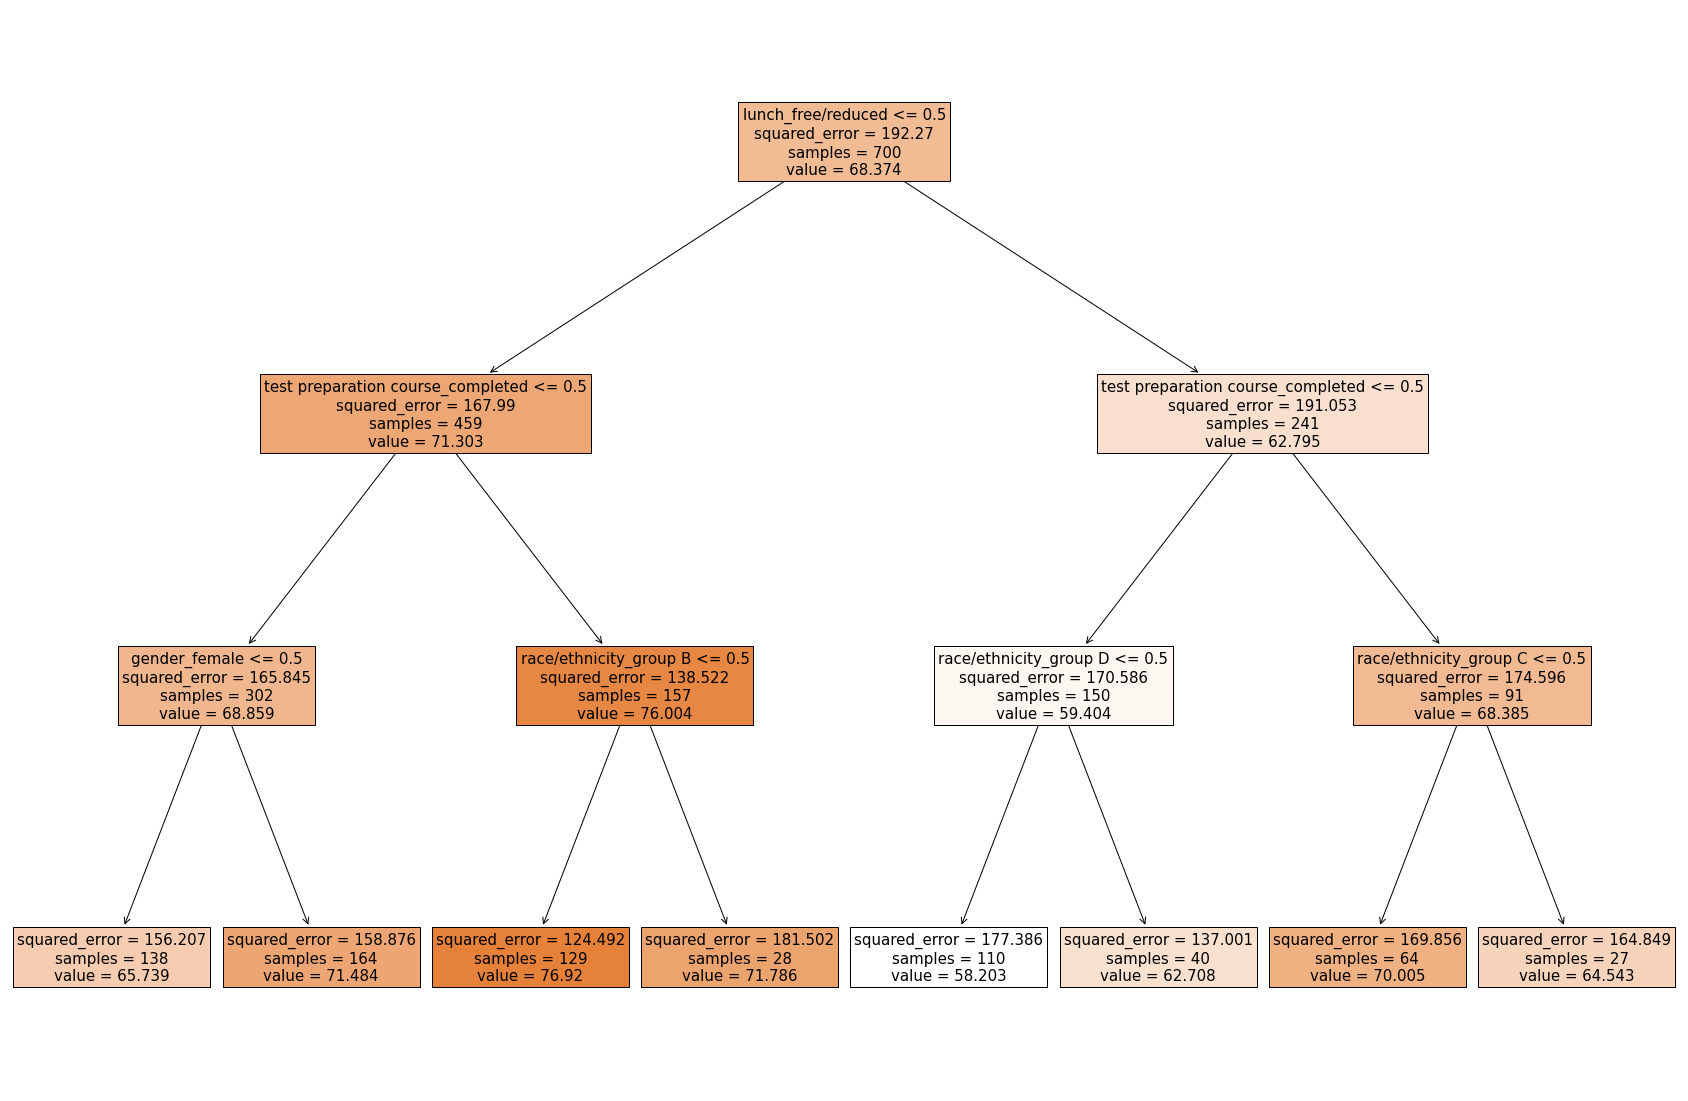

In [45]:
model = DecisionTreeRegressor(max_depth=3,random_state=42)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(30,20))

MSE: 13.965


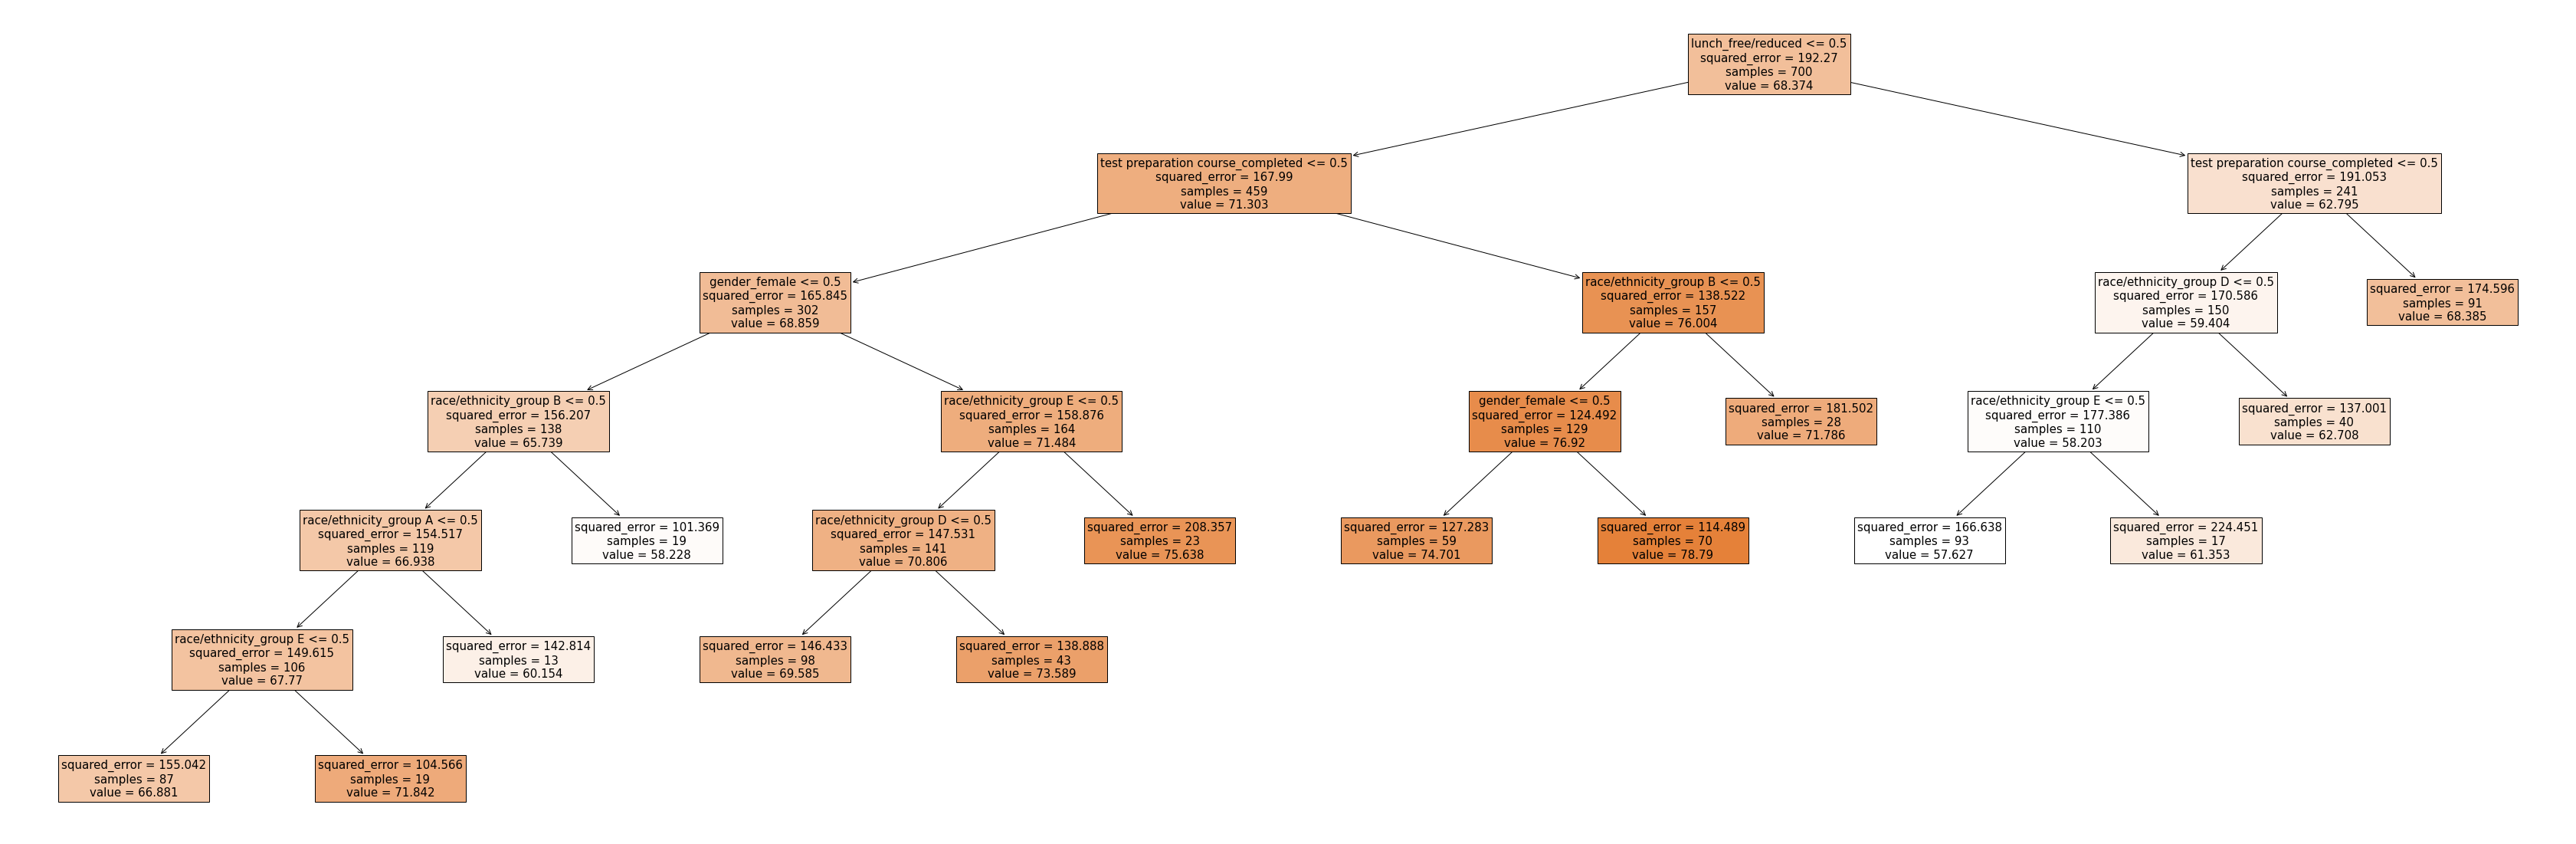

In [46]:
model = DecisionTreeRegressor(min_samples_split=100,random_state=42)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(60,20))

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10000,max_depth=4,max_samples=100,random_state=42)
# RandomForestRegressor  fits a number of classifying decision trees 
# n_estimators is the numbers of trees to be used in the forest

model.fit(X_train,y_train.values.ravel())
eval(X_test,y_test,model)

MSE: 13.752


#### Let's check the error percentage
### The fraction of difference a-b from b is:
# $\frac{|a-b|}{b} $

In [48]:
pred=model.predict(X_test)
(np.abs(pred-y_test.values.ravel())/y_test.values.ravel()).mean()

0.20900999658459885